# Different results for different variables (configuration RET)


## Package imports

In [1]:
import sys
import os
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from droplet_impact import utils as ut, physics_model as pm, config as cfg

## Impact velocity vs Blade velocity

### Impact from droplet radius

/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:53: RuntimeWarning: invalid value encountered in scalar power
  a_max = cfg.R * min(2.2, 3.4966 * pow(We,-0.1391))  # Maximum radius of the droplet
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:48: RuntimeWarning: overflow encountered in scalar power
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:48: RuntimeWarning: invalid value encountered in scalar multiply
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:86: RuntimeWarning: invalid value encountered in scalar add
  dvy_dt = -cfg.g - 0.5*cfg.rho_air*vx*vy*np.pi*(a**2)*(C_stat+cfg.k*b*(cfg.n*cfg.V_blade*(cfg.V_blade-vx)/(cfg.Rc_alpha*pow(1+abs(x-x_blade)/cfg.Rc_alpha,cfg.n+1))-dvx_dt)/(V_slip_x**2))/(4/3 * np.pi * c

Regression results for R=0.38 mm: slope=-0.0009495061898935673, intercept=0.9967332539047876, r_value=-0.954915916744116, p_value=0.0, std_err=9.34422011356381e-06
Regression results for R=0.95 mm: slope=-1.883518561922562e-05, intercept=0.9950685160462768, r_value=-0.2043655638552553, p_value=6.868902738294285e-11, std_err=2.855833386953397e-06
Regression results for R=1.1900000000000002 mm: slope=1.736876446395483e-05, intercept=0.9951507183593568, r_value=0.20009293995041968, p_value=1.7223915496302e-10, std_err=2.6921490152757394e-06
Regression results for R=1.75 mm: slope=4.48151574612476e-05, intercept=0.9953032674642756, r_value=0.48939183112924284, p_value=2.390602240783737e-61, std_err=2.5278500197281862e-06


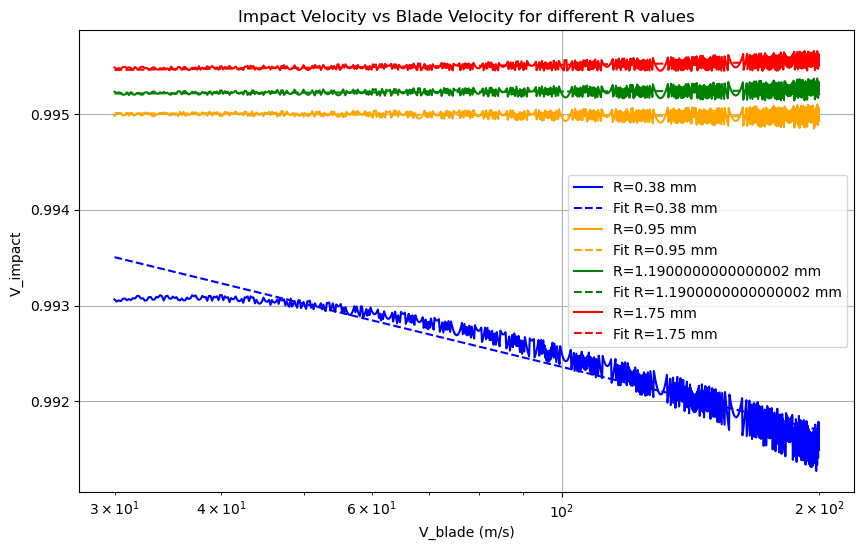

In [5]:
R_values = [0.38e-3, 0.95e-3, 1.19e-3, 1.75e-3]  # in mm
colors = ['blue', 'orange', 'green', 'red']
V_tab = np.linspace(30, 200, 1000)  # V_blade

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Simulation for different values of R
for i in range(len(R_values)):
    res = []
    cfg.R = R_values[i]  # Radius of the droplet 
    cfg.Rc_alpha = 0.004455  # Radius of the blade
    cfg.n = 1.1
    for V in V_tab:
        # Define the initial conditions
        initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, R_values[i]+1e-12, cfg.va0, -0.3, V]
        # Define the parameters for the simulation
        cfg.V_blade = V

        # Solve the equations of motion
        model = pm.RaindropModel(initial_conditions)
        events = [model.hit_the_blade]
        sol = solve_ivp(model.droplet_equations, (0, 0.1), initial_conditions, t_eval=np.linspace(0, 0.1, 100000), method='DOP853', rtol=1e-6, atol=1e-8, events=events)

        # Extract the results
        V_max = sol.y[1, -1]  # Maximum velocity in x direction
        V_impact = V - V_max
        res.append(V_impact/V)  # Normalized impact velocity

    # Convert the results to a numpy array
    res = np.array(res)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(np.log(V_tab), res)
    print(f"Regression results for R={R_values[i]*1e3} mm: slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")

    # Plot the results and the regression line
    plt.plot(V_tab, res, label=f'R={R_values[i]*1e3} mm',color=colors[i])
    plt.plot(V_tab, slope*np.log(V_tab)+intercept, label=f'Fit R={R_values[i]*1e3} mm', linestyle='--',color=colors[i])

plt.xlabel('V_blade (m/s)')
plt.ylabel('V_impact ')
plt.xscale('log')
plt.title('Impact Velocity vs Blade Velocity for different R values')
plt.legend()
plt.grid()
plt.show()

Regression results for Rc_alpha=3.0 cm: slope=-0.035772174884603374, intercept=1.1164899865897255, r_value=-0.9915671580730226, p_value=0.0, std_err=0.00014799341726191224


/Users/emilien/Desktop/X/Stage 3A/Model/src/physics_model.py:41: RuntimeWarning: overflow encountered in scalar power
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/Desktop/X/Stage 3A/Model/src/physics_model.py:41: RuntimeWarning: invalid value encountered in scalar multiply
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)


Regression results for Rc_alpha=5.0 cm: slope=-0.051469187133662914, intercept=1.1508086502388726, r_value=-0.9726926443053145, p_value=0.0, std_err=0.0003887549602042153
Regression results for Rc_alpha=7.1 cm: slope=-0.06502956290623578, intercept=1.177767754441883, r_value=-0.9648684779229065, p_value=0.0, std_err=0.0005605220112844766
Regression results for Rc_alpha=10.0 cm: slope=-0.08269560617475373, intercept=1.2154247983877686, r_value=-0.9612649436152044, p_value=0.0, std_err=0.0007505753356348529


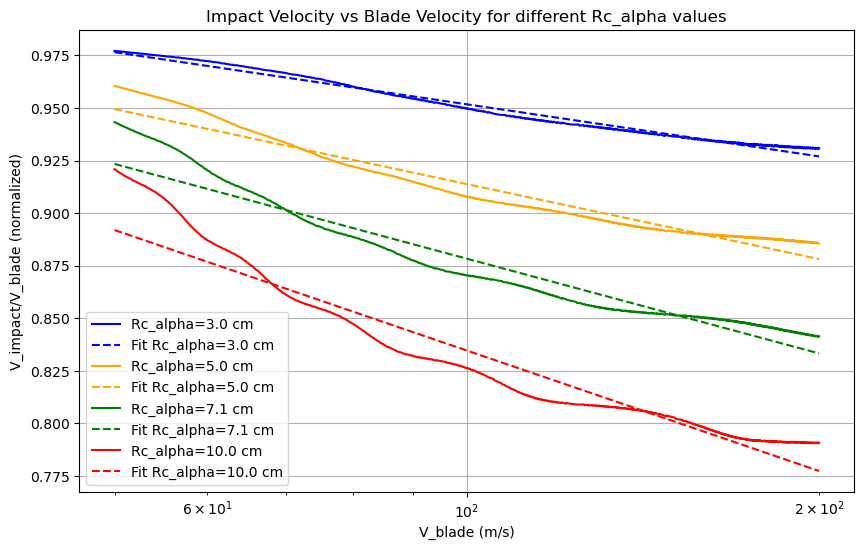

In [ ]:
Rc_values = [3e-2, 5e-2, 7.1e-2, 10e-2] 
colors = ['blue', 'orange', 'green', 'red']
V_tab = np.linspace(50, 200, 1000)  # V_blade

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Simulation for different values of R
for i in range(len(Rc_values)):
    res = []
    cfg.R = 0.49e-3  # Radius of the droplet 
    cfg.Rc_alpha = Rc_values[i]  # Radius of the blade
    cfg.n = 1.3
    for V in V_tab:
        # Define the initial conditions
        initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.R+1e-12, cfg.va0, -0.3, V]
        # Define the parameters for the simulation
        cfg.V_blade = V

        # Solve the equations of motion
        model = pm.RaindropModel(initial_conditions)
        events = [model.hit_the_blade]
        sol = solve_ivp(model.droplet_equations, (0, 0.1), initial_conditions, t_eval=np.linspace(0, 0.1, 100000), method='DOP853', rtol=1e-6, atol=1e-8, events=events)

        # Extract the results
        V_max = sol.y[1, -1]  # Maximum velocity in x direction
        V_impact = V - V_max
        res.append(V_impact / V)  # Normalized impact velocity

    # Convert the results to a numpy array
    res = np.array(res)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(np.log(V_tab), res)
    print(f"Regression results for Rc_alpha={Rc_values[i]*1e2} cm: slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")
    # Plot the results and the regression line
    plt.plot(V_tab, res, label=f'Rc_alpha={Rc_values[i]*1e2} cm',color=colors[i])
    plt.plot(V_tab, slope*np.log(V_tab)+intercept, label=f'Fit Rc_alpha={Rc_values[i]*1e2} cm', linestyle='--',color=colors[i])

plt.xlabel('V_blade (m/s)')
plt.ylabel('V_impact/V_blade (normalized)')
plt.xscale('log')
plt.title('Impact Velocity vs Blade Velocity for different Rc_alpha values')
plt.legend()
plt.grid()
plt.show()

Regression results for n=1.2: slope=-0.07204677333949833, intercept=1.1975888623053128, r_value=-0.9674130763142098, p_value=0.0, std_err=0.0005969071347656772
Regression results for n=1.3: slope=-0.06502956290623578, intercept=1.177767754441883, r_value=-0.9648684779229065, p_value=0.0, std_err=0.0005605220112844766
Regression results for n=1.6: slope=-0.05157816066123466, intercept=1.143651115389276, r_value=-0.9660614937155579, p_value=0.0, std_err=0.00043655676124043847
Regression results for n=1.8: slope=-0.04564918362301026, intercept=1.1296986000974092, r_value=-0.9696071856405397, p_value=0.0, std_err=0.0003646256261023662


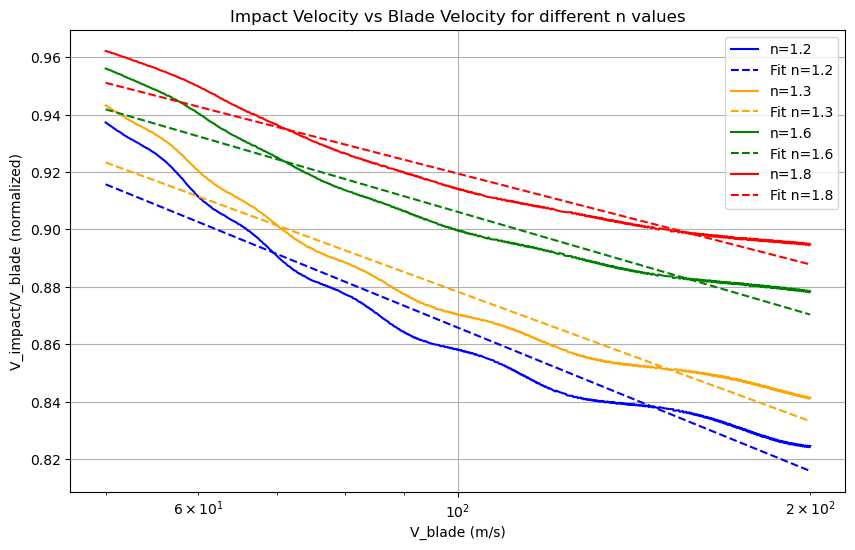

In [ ]:
n_values = [1.2,1.3,1.6,1.8] 
colors = ['blue', 'orange', 'green', 'red']
V_tab = np.linspace(50, 200, 1000)  # V_blade

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Simulation for different values of R
for i in range(len(n_values)):
    res = []
    cfg.R = 0.49e-3  # Radius of the droplet 
    cfg.Rc_alpha = 7.1e-2  # Radius of the blade
    cfg.n = n_values[i]
    for V in V_tab:
        # Define the initial conditions
        initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.R+1e-12, cfg.va0, -0.3, V]
        # Define the parameters for the simulation
        cfg.V_blade = V

        # Solve the equations of motion
        model = pm.RaindropModel(initial_conditions)
        events = [model.hit_the_blade]
        sol = solve_ivp(model.droplet_equations, (0, 0.1), initial_conditions, t_eval=np.linspace(0, 0.1, 100000), method='DOP853', rtol=1e-6, atol=1e-8, events=events)

        # Extract the results
        V_max = sol.y[1, -1]  # Maximum velocity in x direction
        V_impact = V - V_max
        res.append(V_impact / V)  # Normalized impact velocity

    # Convert the results to a numpy array
    res = np.array(res)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(np.log(V_tab), res)
    print(f"Regression results for n={n_values[i]}: slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")

    # Plot the results and the regression line
    plt.plot(V_tab, res, label=f'n={n_values[i]}',color=colors[i])
    plt.plot(V_tab, slope*np.log(V_tab)+intercept, label=f'Fit n={n_values[i]}', linestyle='--',color=colors[i])

plt.xlabel('V_blade (m/s)')
plt.ylabel('V_impact/V_blade (normalized)')
plt.xscale('log')
plt.title('Impact Velocity vs Blade Velocity for different n values')
plt.legend()
plt.grid()
plt.show()

## Impact velocity vs Droplet initial radius

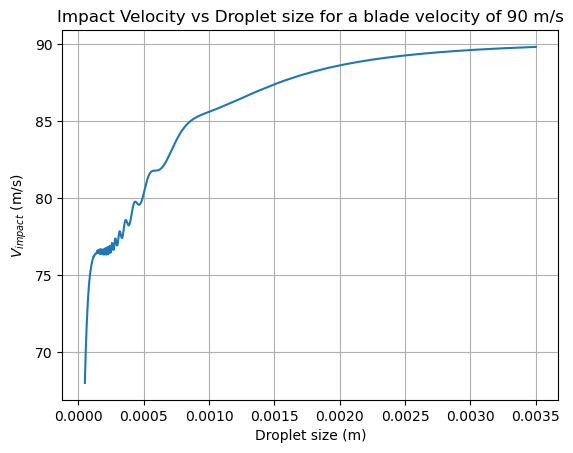

In [ ]:
cfg.V_blade = 90  # V_blade
cfg.Rc_alpha = 0.071  # Radius of the blade
cfg.n = 1.3

Droplet_size = np.linspace(0.05e-3, 3.5e-3, 1000)  
res = []

for d in Droplet_size:
    time_span = (0, 0.1)  # Time span for the simulation
    time_steps = np.linspace(time_span[0], time_span[1], 1000000)  # Time steps for evaluation
    # Define the initial conditions
    cfg.R = d
    cfg.a0 = cfg.R*(1.000001)
    initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0]

    # Solve the equations of motion
    model = pm.RaindropModel(initial_conditions)
    events = [model.hit_the_blade] 
    sol = solve_ivp(model.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853', rtol=1e-6, atol=1e-8, events=events)

    # Extract the results
    V_max =(sol.y[1,-1])
    V_impact = 90-V_max
    res.append(V_impact)

# Convert the results to a numpy array
res = np.array(res)
# Plot the results

plt.plot(Droplet_size, res, label='Model results')
plt.xlabel('Droplet size (m)')
plt.ylabel('$V_{impact}$ (m/s)')
plt.title('Impact Velocity vs Droplet size for a blade velocity of 90 m/s')
plt.grid()
plt.show()


## Impact Velocity vs aerodynamic nose radius

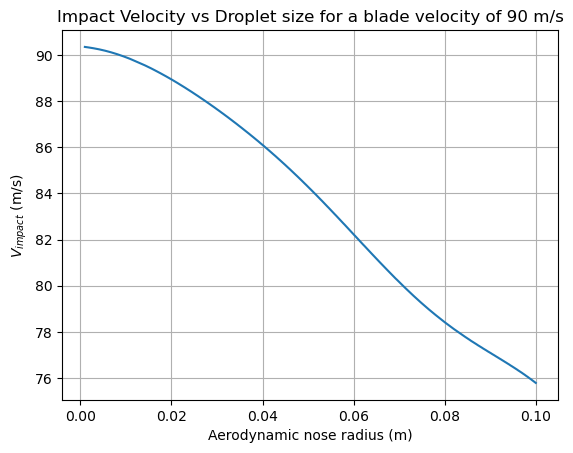

In [ ]:

cfg.V_blade = 90  # V_blade
cfg.R = 0.49e-3  # Radius of the droplet
cfg.a0 = cfg.R*(1.000001)
cfg.n = 1.3

Rcalpha = np.linspace(1e-3, 10e-2, 1000)  
res = []

for r in Rcalpha:
    time_span = (0, 0.1)  # Time span for the simulation
    time_steps = np.linspace(time_span[0], time_span[1], 1000000)  # Time steps for evaluation
    # Define the initial conditions
    cfg.Rc_alpha = r
    initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0]

    # Solve the equations of motion
    model = pm.RaindropModel(initial_conditions)
    events = [model.hit_the_blade, model.b] 
    sol = solve_ivp(model.droplet_equations, t_span=time_span,y0=initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events)

    if not sol.success:
        print(f"Solution failed for droplet size {d}: {sol.message}")
        continue

    # Extract the results
    V_max =(sol.y[1,-1])
    V_impact = 90-V_max
    res.append(V_impact/90)

# Convert the results to a numpy array
res = np.array(res)
# Plot the results

plt.plot(Rcalpha, res, label='Model results')
plt.xlabel('Aerodynamic nose radius (m)')
plt.ylabel('$V_{impact}$ (m/s)')
plt.title('Impact Velocity vs Droplet size for a blade velocity of 90 m/s')
plt.grid()
plt.show()

## Comparison with Vargas 2010

In [2]:
import os,sys

current_dir = os.path.dirname(os.path.abspath('results.ipynb'))
data_dir = os.path.join(current_dir, '..', 'data', 'inputs')

sys.path.append(data_dir)

# Importer le module (remplace 'data_vargas_2011' par le nom réel du fichier sans l'extension .py)
import data_vargas_2011 as data

sys.path.append(os.path.join(current_dir, '..', 'src'))
import visualization as vis

Simulation 1: Droplet hit the blade
Simulation 2: Droplet hit the blade
Simulation 3: Droplet hit the blade
Simulation 4: Droplet hit the blade
Simulation 5: Droplet hit the blade


/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:53: RuntimeWarning: invalid value encountered in scalar power
  a_max = cfg.R * min(2.2, 3.4966 * pow(We,-0.1391))  # Maximum radius of the droplet
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:48: RuntimeWarning: overflow encountered in scalar power
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:48: RuntimeWarning: invalid value encountered in scalar multiply
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)


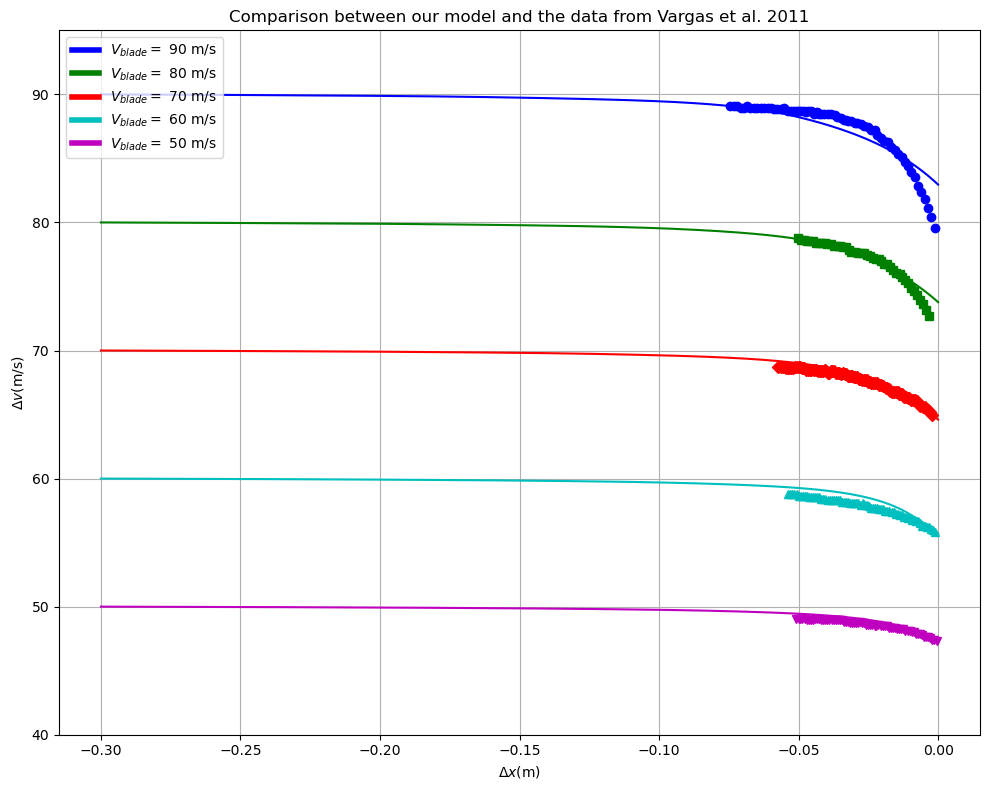

In [5]:
# Solve the differential equations
time_span = (0, 0.1)  # Time span for the simulation
time_steps = np.linspace(time_span[0], time_span[1], 1000000)  # Time steps for evaluation


#--------------------------- TEST 1 ------------------------------
# # Initial conditions
initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0] # Initial conditions for the droplet
cfg.V_blade = 90   # Air velocity (m/s)
# Create an instance of the RaindropModel
model1 = pm.RaindropModel(initial_conditions)
events1 = [model1.hit_the_blade] 
sol1 = solve_ivp(model1.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events1)
if sol1.t_events[0].size > 0:
    print("Simulation 1: Droplet hit the blade")
else:
    print("Simulation 1: Not long enough to hit the blade")


#--------------------------- TEST 2 ------------------------------
# Initial conditions
initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0] 
# Create an instance of the RaindropModel
model2 = pm.RaindropModel(initial_conditions)
events2 = [model2.hit_the_blade] 
cfg.V_blade = 80  # Air velocity (m/s)
sol2 = solve_ivp(model2.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events2)
if sol2.t_events[0].size > 0:
    print("Simulation 2: Droplet hit the blade")
else:
    print("Simulation 2: Not long enough to hit the blade")


#--------------------------- TEST 3 ------------------------------

# Initial conditions
initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0] 
# Create an instance of the RaindropModel
model3 = pm.RaindropModel(initial_conditions)
events3 = [model3.hit_the_blade] 
cfg.V_blade = 70 # Air velocity (m/s)  
sol3 = solve_ivp(model3.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events3)
if sol3.t_events[0].size > 0:
    print("Simulation 3: Droplet hit the blade")
else:
    print("Simulation 3: Not long enough to hit the blade")


#--------------------------- TEST 4 ------------------------------

# Initial conditions
initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0] 
# Create an instance of the RaindropModel
model4 = pm.RaindropModel(initial_conditions)
events4 = [model4.hit_the_blade] 
cfg.V_blade = 60 # Air velocity (m/s)  
sol4 = solve_ivp(model4.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events4)
if sol4.t_events[0].size > 0:
    print("Simulation 4: Droplet hit the blade")
else:
    print("Simulation 4: Not long enough to hit the blade")

#--------------------------- TEST 5 ------------------------------

# Initial conditions
initial_conditions = [cfg.x0, cfg.vx0, cfg.y0, cfg.vy0, cfg.a0, cfg.va0,-0.3,cfg.vx_blade0] 
# Create an instance of the RaindropModel
model5 = pm.RaindropModel(initial_conditions)
events5 = [model5.hit_the_blade] 
cfg.V_blade = 50 # Air velocity (m/s)  
sol5 = solve_ivp(model5.droplet_equations, time_span, initial_conditions, t_eval=time_steps, method='DOP853',rtol=1e-6, atol=1e-8,events=events5)
if sol5.t_events[0].size > 0:
    print("Simulation 5: Droplet hit the blade")
else:
    print("Simulation 5: Not long enough to hit the blade")

vis.plot_comparaison_deltav([sol1, sol2, sol3,sol4,sol5],[90,80,70,60,50],['$V_{blade} =$ 90 m/s', '$V_{blade} =$ 80 m/s', '$V_{blade} =$ 70 m/s', '$V_{blade} =$ 60 m/s', '$V_{blade} =$ 50 m/s'])
